# Сборный проект - 1

**Цель исследования:**

Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Ход исследования:**

Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы 
 
Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ.
 4. Проверка гипотез.

https://drive.google.com/file/d/1qXXMGhG8TJ2Bq6GgUnOPfo29cKMHOvER/view?usp=sharing

In [1]:
! gdown --id 1qXXMGhG8TJ2Bq6GgUnOPfo29cKMHOvER

/bin/bash: gdown: command not found


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [3]:
try:
    df = pd.read_csv('/content/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

В первую очередь приведу названия столбцов к нижнему регистру. В данных много пропусков. Проанализирую каждый столбец с пропусками и приму решение, что с ними делать. Есть столбцы, в которых необходимо поменять тип переменной (например, year_of_release и user_score)

In [6]:
#приведу названия столбцов к единому регистру
df.columns = map(str.lower, df.columns)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
#посмотрим на процент пропущенных значений в датафрейме
df.isna().mean().sort_values(ascending=False)

critic_score       0.513192
rating             0.404786
user_score         0.400897
year_of_release    0.016093
name               0.000120
genre              0.000120
platform           0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
dtype: float64

В столбце year_of_release точно восстановить данные не представляется возможным. Доля пропущенных значений крайне мала (1,6%) и на результат не повлияет, поэтому удалю их. Заменю тип переменной на int.

In [8]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [9]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

In [10]:
df['user_score'].value_counts(dropna=False)

NaN    6607
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1         2
0.6       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

В столбце user_score имеются строковые значения tbd, что означает 'To Be Determined' - будет определено позже. Чтобы привести столбец к вещественному типу и иметь возможность применить к нему математические операции, заменю tbd на Nan, затем заполню пропуски значением -1.

In [11]:
df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True)
df['user_score'].fillna(-1, inplace=True)
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       16446 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


В столбце critic_score не вижу смысла заполнять пропуски средним или медианой, т.к. это субъективное мнение критика. Заполню пропуски значением -1.

В столбце rating заменю пропуски на значение RP. По классификации ESRB это raiting pending - Ожидается присвоение рейтинга.

In [12]:
df['critic_score'].fillna(-1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  float64
 9   user_score       16446 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [13]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [14]:
df['rating'] = df['rating'].fillna('RP')
df['rating'].value_counts()

RP      6679
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

In [15]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,RP
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,RP


In [16]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,RP
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,RP


Удалю 2 строки с пропусками в названии и жанре игр.

In [17]:
#удаляю строки
df = df.dropna(subset=['name', 'genre']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [18]:
#удалим явные дубликаты
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [19]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP,31.38


# Исследовательский анализ

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [20]:
#создам сводник, в котором посчитаю количество выпущенных игр по годам
df.query('year_of_release != -1').groupby('year_of_release')['name'].count().head()

year_of_release
1980     9
1981    46
1982    36
1983    17
1984    14
Name: name, dtype: int64

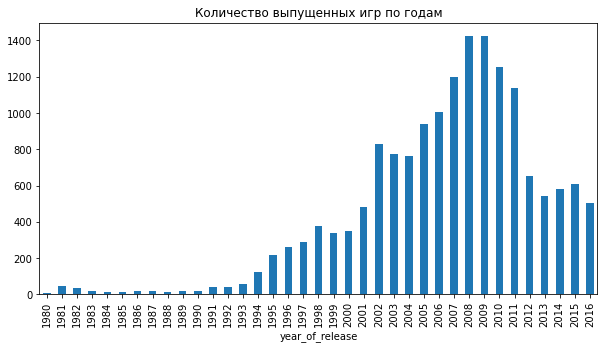

In [21]:
#строю гистограмму
(
    df.groupby(
            'year_of_release')['name'].count()
            ).plot(
                kind='bar', figsize=(10,5), title='Количество выпущенных игр по годам'
                );

С 1980 по 1993 годы игр выпускалось очень мало.

Начиная с 1994 года видим рост выпуска игра. Пик приходится на 2008-2009 годы.

После 2009 года начинается падение. Резкое падение выпуска игр видим после 2011 года.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [22]:
#посмотрим на платформы с наибольшими суммарными продажами
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

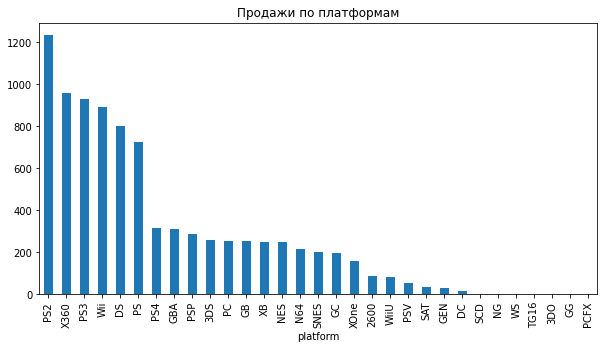

In [23]:
df.groupby(
        'platform')['total_sales'].sum().sort_values(ascending=False).plot(
            kind='bar', figsize=(10,5), title='Продажи по платформам');

Топ-6 платформ по продажам: PS2, X360, PS3, Wii, DS и PS. Построю график продаж по годам для каждой платформы.

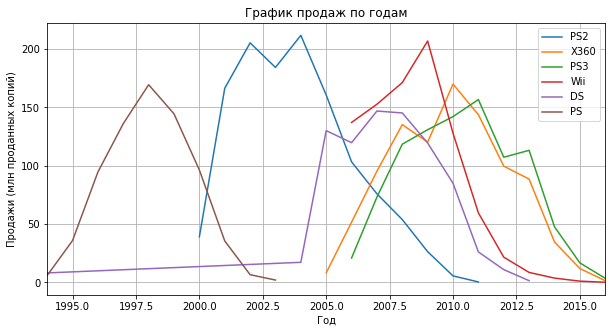

In [24]:
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for i in platforms :
    df.query('platform == @i and year_of_release != -1').groupby('year_of_release')['total_sales'].sum().plot(label=i,
                                                                                    xlabel='Год',
                                                                                    ylabel='Продажи (млн проданных копий)',
                                                                                    title='График продаж по годам',
                                                                                    xlim=(1994, 2016),
                                                                                    figsize=(10,5),
                                                                                    legend=True,
                                                                                    grid=True)

Посмотрим на продолжительность жизни платформ на графике:

- DS была выпущена в 2004 году. Поддержка прекращена в 2013 году;
- PS была выпущена в 1994 году и просуществовала до 2003 года;
- PS2 была выпущена в 2000 году. В 2013 Sony подтвердила, что производство PlayStation 2 прекращено по всему миру;
- X360 была официально анонсирована в 2005 году. В 2016 было объявлено о прекращении производства;
- PS3 была выпущена в 2006 году. Производство PS3 было прекращено в 2017 году;
- Wii появилась в 2006 году. Выпуск Wii был прекращен в 2013 году.

Можно сделать вывод, что средняя продолжительность жизни платформы примерно 10 лет.

**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

Посмотрим, какая платформа была наиболее популярна в 2016 году и посмотрим на ее распределение.

In [25]:
df.query('year_of_release == 2016').groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64

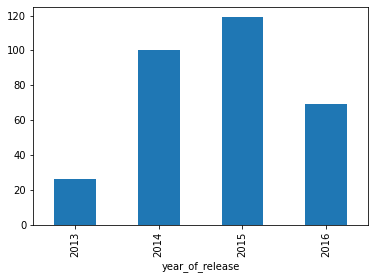

In [26]:
df[df['platform'] == 'PS4'].groupby('year_of_release')['total_sales'].sum().plot(kind='bar');

Самой прибыльной платформой в 2016 году была PS4. По распределению видно, что рост продаж произошел в 2014 году. Пик пришелся на 2015.

Исходя из этого, возьмем за актуальный период 2013-2016 года.

In [27]:
#уберу предыдущие годы из датасета
df = df.query('year_of_release >= 2013')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,RP,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [28]:
#посмотрим, какие платформы лидируют по продажам за актуальный период
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

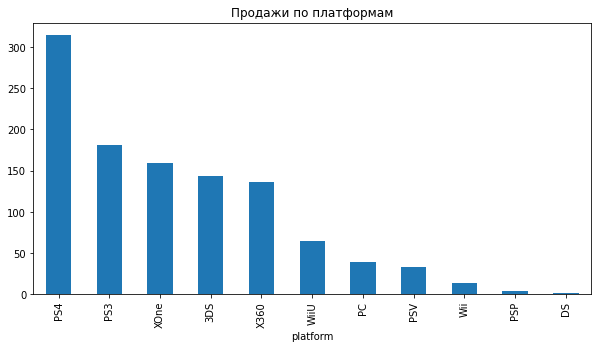

In [29]:
df.groupby(
        'platform')['total_sales'].sum().sort_values(
            ascending=False).plot(
                kind='bar', figsize=(10,5), title='Продажи по платформам');

Выделю топ-5 платформ - это PS4, PS3, XOne, 3DS, и X360.

Построю график продаж по годам для топ-5 платформ.

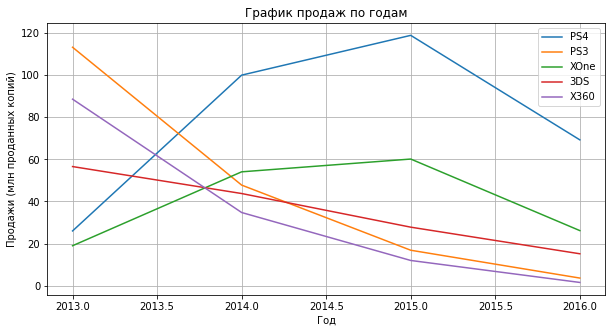

In [30]:
platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360']
for i in platforms :
    df.query('platform == @i and year_of_release != -1').groupby('year_of_release')['total_sales'].sum().plot(label=i,
                                                                                    xlabel='Год',
                                                                                    ylabel='Продажи (млн проданных копий)',
                                                                                    title='График продаж по годам',
                                                                                    figsize=(10,5),
                                                                                    legend=True,
                                                                                    grid=True)

Судя по графику, потенциально прибыльными платформами являются PS4 и XOne.

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

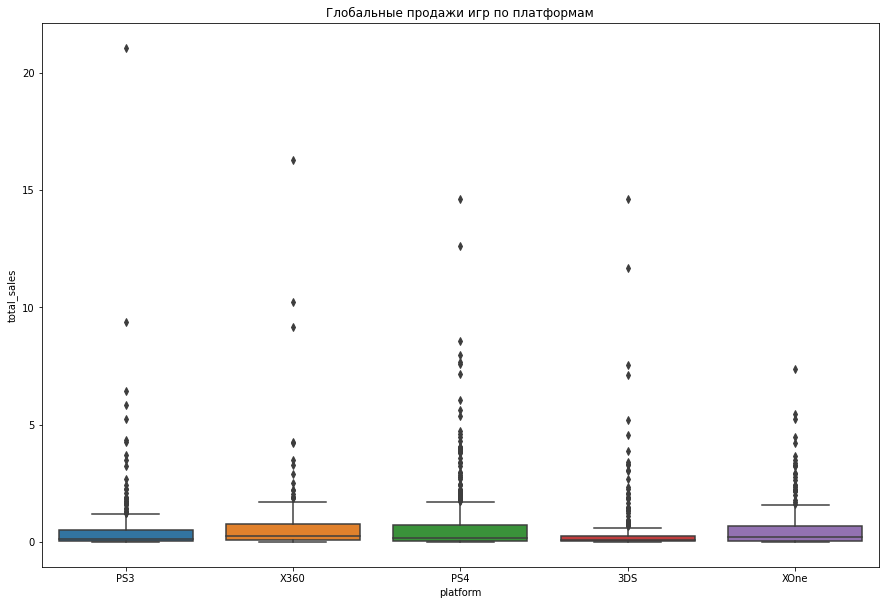

In [31]:
plt.figure(figsize=(15,10))
sns.boxplot(
    data=df.query(
        'platform in ["PS4", "PS3", "XOne", "3DS",  "X360"]'), y='total_sales', x='platform').set(
        title='Глобальные продажи игр по платформам');

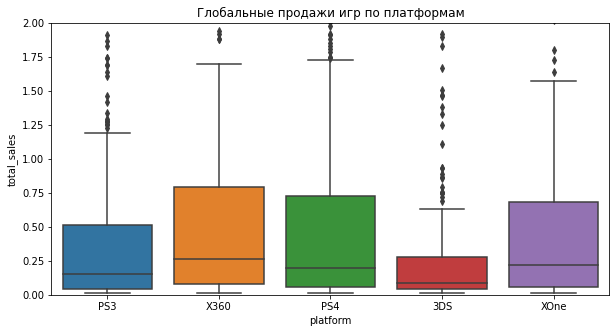

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df.query(
        'platform in ["PS4", "PS3", "XOne", "3DS",  "X360"]'), y ='total_sales', x='platform').set(
    ylim=(0, 2), title='Глобальные продажи игр по платформам');

In [33]:
df_top5 = df.query('platform in ["PS4", "PS3", "XOne", "3DS",  "X360"]')
df_top5.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,RP,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [34]:
for platform in df_top5['platform'].unique():
    p = df_top5.query('platform == @platform')
    print('Платформа', platform)
    print(p['total_sales'].describe())
    print(' ')

Платформа PS3
count    345.000000
mean       0.525884
std        1.451939
min        0.010000
25%        0.040000
50%        0.150000
75%        0.510000
max       21.050000
Name: total_sales, dtype: float64
 
Платформа X360
count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64
 
Платформа PS4
count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64
 
Платформа 3DS
count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64
 
Платформа XOne
count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max 

Лидерами по продажам за актуальный период являются платформы X360, PS4 и XOne. Их медиана варьируется в пределах 2 - 2.65 млн проданных копий. Верхняя граница усов находится примерно на отметке 17 млн проданных копий.

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

Возьмем платформу PS4 и посмотрим, как отзывы пользователей и критиков влияют на продажи.

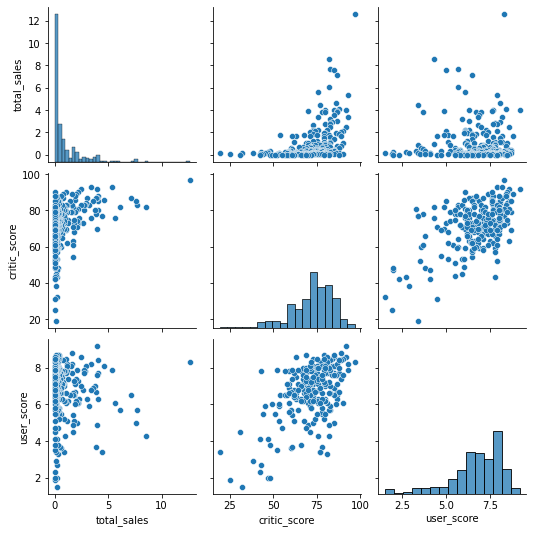

In [35]:
cols = ['total_sales', 'critic_score', 'user_score']
sns_plot = sns.pairplot(df_top5.query('platform == "PS4" and critic_score != -1 and user_score != -1')[cols])

In [36]:
df_top5.query(
    'platform == "PS4" and critic_score != -1 and user_score != -1')['critic_score'].corr(
        df_top5.query('platform == "PS4" and critic_score != -1 and user_score != -1')['total_sales'])

0.40589480145836687

Корреляция в 0.40 говорит о наличии связи, однако не слишком сильной. Выходит, более высокая оценка критиков сопровождается более высокими продажами, но так бывает не всегда.

In [37]:
df_top5.query(
    'platform == "PS4" and critic_score != -1 and user_score != -1')['user_score'].corr(
        df_top5.query('platform == "PS4" and critic_score != -1 and user_score != -1')['total_sales'])

-0.03362497596528878

Отзывы пользователей никак не влияют на продажи (корреляция равна -0.03). 

**Соотнесите выводы с продажами игр на других платформах.**

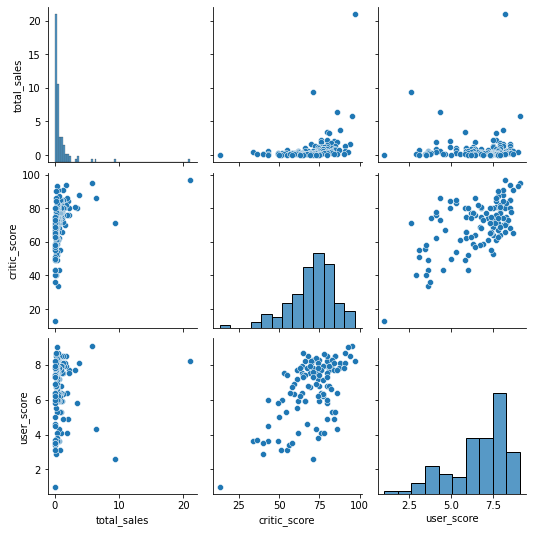

In [38]:
#посмотрим на взаимосвязь отзывов критиков и пользователей и рост продаж у других платформ
cols = ['total_sales', 'critic_score', 'user_score']
sns_plot = sns.pairplot(df_top5.query('platform == "PS3" and critic_score != -1 and user_score != -1')[cols])

In [39]:
df_top5.query(
    'platform == "PS3" and critic_score != -1 and user_score != -1')['critic_score'].corr(
        df_top5.query('platform == "PS3" and critic_score != -1 and user_score != -1')['total_sales'])

0.33380663565061736

In [40]:
df_top5.query(
    'platform == "PS3" and critic_score != -1 and user_score != -1')['user_score'].corr(
        df_top5.query('platform == "PS3" and critic_score != -1 and user_score != -1')['total_sales'])

0.02269094327112414

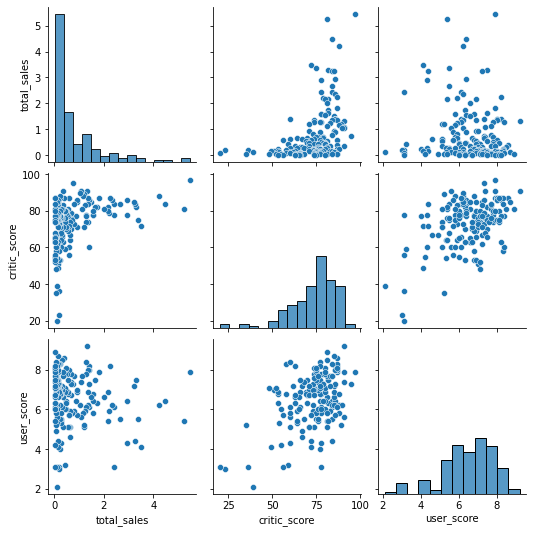

In [41]:
cols = ['total_sales', 'critic_score', 'user_score']
sns_plot = sns.pairplot(df_top5.query('platform == "XOne" and critic_score != -1 and user_score != -1')[cols])

In [42]:
df_top5.query(
    'platform == "XOne" and critic_score != -1 and user_score != -1')['critic_score'].corr(
        df_top5.query('platform == "XOne" and critic_score != -1 and user_score != -1')['total_sales'])

0.41042203561296375

In [43]:
df_top5.query(
    'platform == "XOne" and critic_score != -1 and user_score != -1')['user_score'].corr(
        df_top5.query('platform == "XOne" and critic_score != -1 and user_score != -1')['total_sales'])

-0.09400318326920852

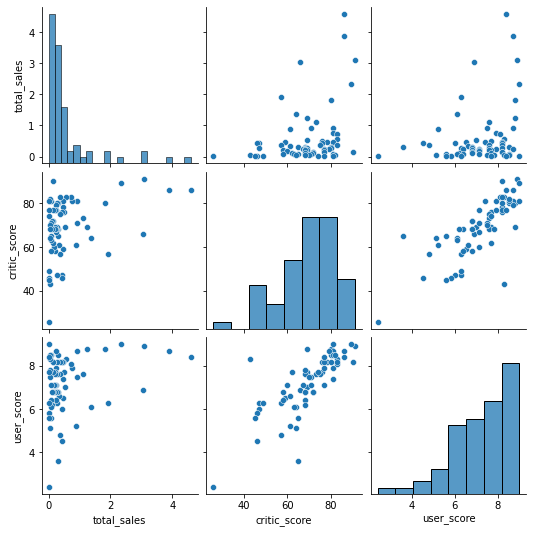

In [44]:
cols = ['total_sales', 'critic_score', 'user_score']
sns_plot = sns.pairplot(df_top5.query('platform == "3DS" and critic_score != -1 and user_score != -1')[cols])

In [45]:
df_top5.query(
    'platform == "3DS" and critic_score != -1 and user_score != -1')['critic_score'].corr(
        df_top5.query('platform == "3DS" and critic_score != -1 and user_score != -1')['total_sales'])

0.3392349287853147

In [46]:
df_top5.query(
    'platform == "3DS" and critic_score != -1 and user_score != -1')['user_score'].corr(
        df_top5.query('platform == "3DS" and critic_score != -1 and user_score != -1')['total_sales'])

0.2729904366942444

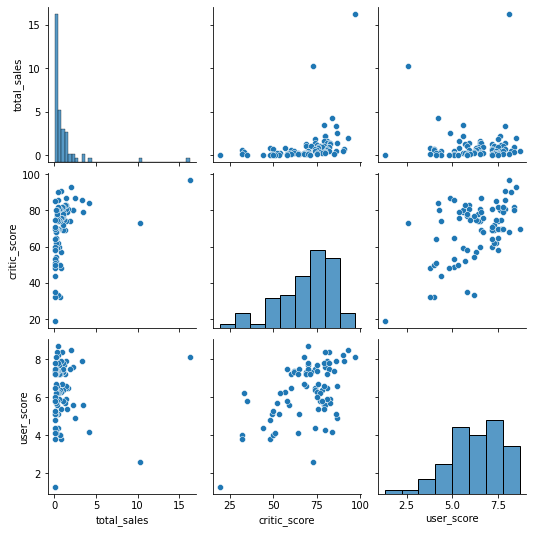

In [47]:
cols = ['total_sales', 'critic_score', 'user_score']
sns_plot = sns.pairplot(df_top5.query('platform == "X360" and critic_score != -1 and user_score != -1')[cols])

In [48]:
df_top5.query(
    'platform == "X360" and critic_score != -1 and user_score != -1')['critic_score'].corr(
        df_top5.query('platform == "X360" and critic_score != -1 and user_score != -1')['total_sales'])

0.3503445460228664

In [49]:
df_top5.query(
    'platform == "X360" and critic_score != -1 and user_score != -1')['user_score'].corr(
        df_top5.query('platform == "X360" and critic_score != -1 and user_score != -1')['total_sales'])

-0.006238179532306317

Видим, что по другим платформам ситуация похожая. Оценка критиков влияет на продажи, но не всегда так происходит. Оценка пользователей никак не влияет на продажи.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [50]:
df_genre = df.groupby(
        'genre')['total_sales'].sum().sort_values(
            ascending=False)
df_genre

genre
Action          321.87
Shooter         232.98
Sports          150.65
Role-Playing    145.89
Misc             62.82
Platform         42.63
Racing           39.89
Fighting         35.31
Adventure        23.64
Simulation       21.76
Strategy         10.08
Puzzle            3.17
Name: total_sales, dtype: float64

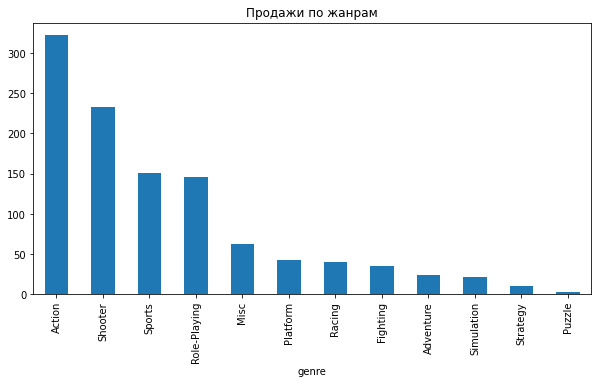

In [51]:
#посмотрим на общее распределение
df.groupby(
        'genre')['total_sales'].sum().sort_values(
            ascending=False).plot(
                kind='bar', figsize=(10,5), title='Продажи по жанрам');

Судя по распределению самым прибыльным является жанр Action. Можно выделить топ-4 жанра: Action, Shooter, Sports и Role-Playing. Остальные жанры сильно уступают по продажам.

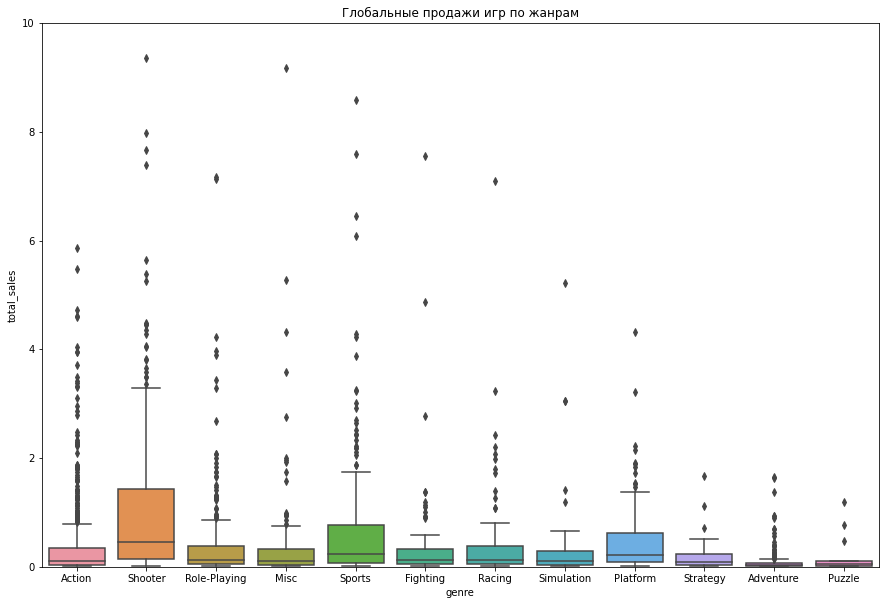

In [52]:
#построим диаграмму размаха и посмотрим на средние и медианные продажи
plt.figure(figsize=(15,10))
sns.boxplot(
    data=df, y ='total_sales', x='genre').set(
    ylim=(0, 10), title='Глобальные продажи игр по жанрам');

In [53]:
for genre in df['genre'].unique():
    p = df.query('genre == @genre')
    print('Жанр', genre)
    print(p['total_sales'].describe())
    print(' ')

Жанр Action
count    766.000000
mean       0.420196
std        1.253909
min        0.010000
25%        0.030000
50%        0.110000
75%        0.337500
max       21.050000
Name: total_sales, dtype: float64
 
Жанр Shooter
count    187.000000
mean       1.245882
std        2.014107
min        0.010000
25%        0.140000
50%        0.450000
75%        1.425000
max       14.630000
Name: total_sales, dtype: float64
 
Жанр Role-Playing
count    292.000000
mean       0.499623
std        1.353164
min        0.010000
25%        0.060000
50%        0.125000
75%        0.382500
max       14.600000
Name: total_sales, dtype: float64
 
Жанр Misc
count    155.000000
mean       0.405290
std        1.007985
min        0.010000
25%        0.030000
50%        0.100000
75%        0.330000
max        9.180000
Name: total_sales, dtype: float64
 
Жанр Sports
count    214.000000
mean       0.703972
std        1.219237
min        0.010000
25%        0.070000
50%        0.240000
75%        0.765000
max        

- По средним продажам лидирует жанр Shooter. На втором и третьем месте - Sports и Platform.
- Самыми непопулярными жанрами являются Adventure, Simulation, Strategy и Puzzle.

# Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

*   Самые популярные платформы (топ-5). Опишите различия в долях продаж.
*   Самые популярные жанры (топ-5). Поясните разницу.
*   Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [54]:
#сохраню топ-5 платформ по регионам в отдельные переменные
na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index().head(5)
eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index().head(5)
jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index().head(5)

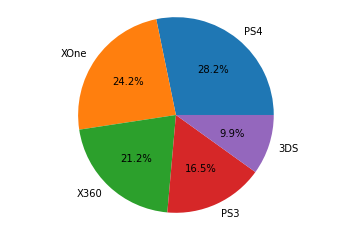

In [55]:
#построю круговые диаграммы для каждого региона
fig, ax = plt.subplots()
ax.pie(na.na_sales, labels=na.platform, autopct='%1.1f%%')
ax.axis("equal");

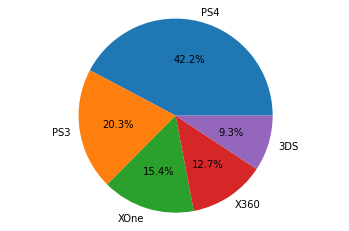

In [56]:
fig, ax = plt.subplots()
ax.pie(eu.eu_sales, labels=eu.platform, autopct='%1.1f%%')
ax.axis("equal");

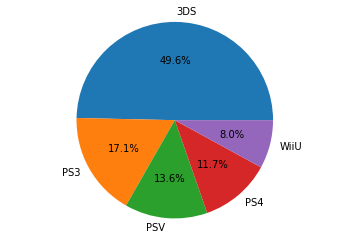

In [57]:
fig, ax = plt.subplots()
ax.pie(jp.jp_sales, labels=jp.platform, autopct='%1.1f%%')
ax.axis("equal");

- в топ-5 по Северной Америке попали платформы PS4(28,2%), XOne(24,2%), X360(21,2%), PS3(16,5%) и 3DS(9,9%);
- в топ-5 по Европе попали платформы PS4(42,2%), PS3(20,3%), XOne(15,4%), X360(12,7%) и 3DS(9,3%);
- в топ-5 по Японии попали платформы 3DS(49,6%), PS3(17,1%), PSV(13,6%), PS4(11,7%) и WiiU(8,0%);


In [58]:
#теперь посмотрим на топ-5 жанров по регионам
na_genre = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index().head(5)
eu_genre = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index().head(5)
jp_genre = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index().head(5)

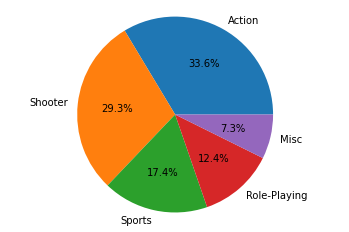

In [59]:
#так же построю круговые диаграммы для каждого региона
fig, ax = plt.subplots()
ax.pie(na_genre.na_sales, labels=na_genre.genre, autopct='%1.1f%%')
ax.axis("equal");

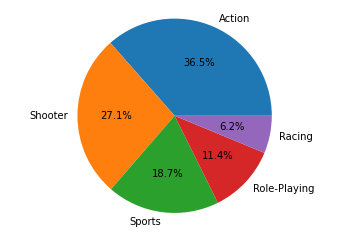

In [60]:
fig, ax = plt.subplots()
ax.pie(eu_genre.eu_sales, labels=eu_genre.genre, autopct='%1.1f%%')
ax.axis("equal");

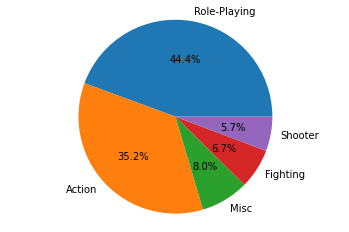

In [61]:
fig, ax = plt.subplots()
ax.pie(jp_genre.jp_sales, labels=jp_genre.genre, autopct='%1.1f%%')
ax.axis("equal");

- в Северной Америке доминируют Action(33,6%), Shooter(29,3%), Sports(17,4%), Role-Playing(12,4%) и Misc(7,3%);
- в Европе доминируют Action(36,5%), Shooter(27,1%), Sports(18,7%), Role-Playing(11,4%) и Racing(6,2%);
- в Японии доминируют Role-Playing(44,4%), Action(35,2%), Misc(8,0%), Fighting(6,7%) и Shooter(5,7%);

In [62]:
#теперь посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе
na_rating = df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index().head(5)
eu_rating = df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index().head(5)
jp_rating = df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index().head(5)

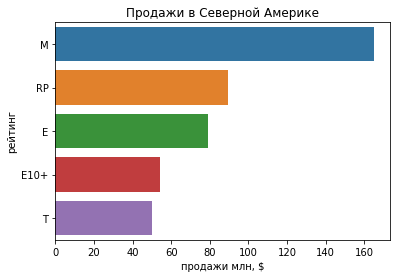

In [63]:
x = na_rating.rating
y = na_rating.na_sales

sns.barplot(x=y, y=x)
plt.title('Продажи в Северной Америке')
plt.ylabel("рейтинг")
plt.xlabel('продажи млн, $');

В Северной Америке больше всего продаж игр с рейтингом «M» («Mature») — «Для взрослых», далее следуют рейтинг «RP» («Rating Pending») — «Рейтинг ожидается», «E» («Everyone») — «Для всех», «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» и «T» («Teen») — «Подросткам». 

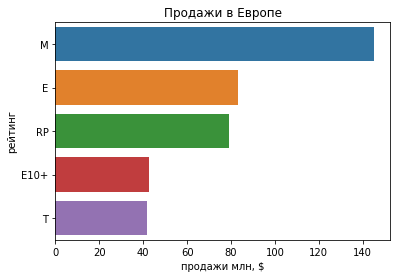

In [64]:
x = eu_rating.rating
y = eu_rating.eu_sales

sns.barplot(x=y, y=x)
plt.title('Продажи в Европе')
plt.ylabel("рейтинг")
plt.xlabel('продажи млн, $');

В Европе ситуация с продажами по рейтингу игр очень похожа на Северную Америку с одним небольшим исключением - на втором месте стоит рейтинг «E» («Everyone») — «Для всех», а на третьем - «RP» («Rating Pending») — «Рейтинг ожидается».

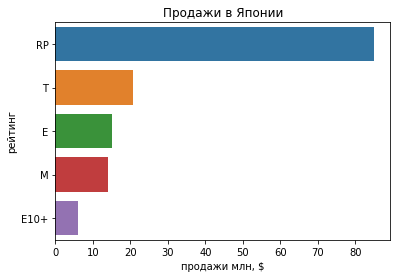

In [65]:
x = jp_rating.rating
y = jp_rating.jp_sales

sns.barplot(x=y, y=x)
plt.title('Продажи в Японии')
plt.ylabel("рейтинг")
plt.xlabel('продажи млн, $');

А вот в Японии с явным преимуществом лидируют игры с рейтингом «RP» («Rating Pending») — «Рейтинг ожидается». Далее следуют рйтинги «T» («Teen») — «Подросткам», «E» («Everyone») — «Для всех», «M» («Mature») — «Для взрослых» и «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

- В Америке и Европе портрет пользователя выглядит следующим образом - это взрослые люди старше 18 лет, которые чаще всего играют в Action и Shooter на консоли PS4.

- В Японии картина отличается - пользователи - подростки, которые чаще играют в Role-Playing и Action на консоли 3DS.
Так как в Японии лидирует рейтинг RP, можно предположить, что пользователи чаще выбирают новинки, которые еще не получили рйтинг ESRB.

# Проверка гипотез

- H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные
- 𝛼=5%

In [66]:
XOne = df.query('platform == "XOne" and user_score != -1')['user_score']
PC = df.query('platform == "PC" and user_score != -1')['user_score']

alpha = .05

results = st.ttest_ind(
    XOne, 
    PC,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Значение p-value показывает: вероятность случайно получить такое или большее различие равно почти 15%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами.

In [67]:
#посмотрим на средний пользовательский рейтинг
XOne.mean()

6.521428571428572

In [68]:
PC.mean()

6.2696774193548395

Действительно, видим, что средний пользовательский рейтинг по консоли XOne не сильно отличается от среднего рейтинга по консоли PC.

- H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые
- H1 - Средние пользовательские рейтинги жанров Action и Sports разные
- 𝛼=5%

In [69]:
action = df.query('genre == "Action" and user_score != -1')['user_score']
sports = df.query('genre == "Sports" and user_score != -1')['user_score']

alpha = .05

results = st.ttest_ind(
    action, 
    sports,
    equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


In [70]:
#посмотрим на средний пользовательский рейтинг
action.mean()

6.837532133676092

In [71]:
#посмотрим на средний пользовательский рейтинг
sports.mean()

5.238124999999999

Средний пользовательский рейтинг у жанра Action выше, чем у жанра Sports.

# Общий вывод

1. Были изучены данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. В ходе подготовки данных были исправлены ошибки:
- заменила названия столбцов (привела к нижнему регистру);
- в столбцах year_of_release и user_score преобразовала данные в нужные типы;
- удалила строки без названия игр и жанров и без года выпуска;
- в остальных столбцах заменила пропуски на нереальные значения, чтобы была возможность в дальнейшем фильтровать их;
- посчитала суммарные продажи во всех регионах и записала их в отдельный столбец.
2. Провела исследовательский анализ, в ходе которого было выявлено:
- С 1980 по 1993 годы игр выпускалось очень мало. Начиная с 1994 года видим рост выпуска игра. Пик приходится на 2008-2009 годы. После 2009 года начинается падение. Резкое падение выпуска игр видим после 2011 года.
- Проанализировала, как менялись продажи по платформам. Выделила топ-6 платформ с наибольшими суммарными продажами - PS2, X360, PS3, Wii, DS и PS. С помощью графика определила примерную продолжительность каждой платформы - 10 лет.
- На основании исследования определила актуальный период 2013-2016 год.
- Выделила топ-5 платформ за актуальный период - PS4, PS3, XOne, 3DS, и X360. К потенциально прибыльным отнесла PS4 и XOne.
- По результатам диаграммы размаха выделила тройку лидеров X360, PS4 и XOne по средней и медианной продажам.
- Изучила, как влияют на продажи внутри одной популярной платформы (PS4) отзывы пользователей и критиков. Посчитала корреляцию. Корреляция в 0.40 говорит о наличии связи, однако не слишком сильной. Выходит, более высокая оценка критиков сопровождается более высокими продажами, но так бывает не всегда. Отзывы пользователей никак не влияют на продажи (корреляция равна -0.03).
- Соотнесла выводы с продажами игр на других платформах и сделала вывод, что по другим платформам ситуация похожая. Оценка критиков влияет на продажи, но не всегда так происходит. Оценка пользователей никак не влияет на продажи.
- На основании общего распределения игр по жанрам выделила четверку лидеров - Action, Shooter, Sports и Role-Playing. По средним и медианным продажам лидируют Shooter, Sports и Platform. Самыми непопулярными жанрами являются Adventure, Simulation, Strategy и Puzzle.
3. Составила портрет пользователя для каждого региорна:
- В разбивке по регионам я бы объединила пользователей из Северной Америки и Европы, т.к. пользователи этих регионов имеют похожие предпочтения.
- В Северной Америке и Европе лидирую игры для взрослых старше 18 лет на платформе PS4. Любимыми жанрами являются Action и Shooter.
- В Японии дела обстоят по-другому: пользователи - чаще всего подростки, которые выбирают Role-Playing и Action. Самая популярная платформа в Японии - 3DS.
- Также в Японии была выявлена популярность игр с рейтингом RP (рейтинг ожидается). Возможно пользователи этого региона чаще пробуют новинки рынка.
4. Проверила гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза подтвердилась. Действительно, средний пользовательский рейтинг по консоли XOne не сильно отличается от среднего рейтинга по консоли PC.
- Средние пользовательские рейтинги жанров Action и Sports одинаковые. Гипотеза не подтвердилась. Средний пользовательский рейтинг у жанра Action выше, чем у жанра Sports.
5. Рекомендации:
- Для Северной Америки и Европы делать ставку на игры для взрослых (18+) в жанре Action, Shooter, Sports на платформах PS4 и XOne.
- Для Японии выпускать игры преимущественно для подростков на платформе 3DS. Делать упор на жанры Action и Role-Playing.
- Не брать во внимание отзывы пользователей, они никак не влияют на продажи игр. А вот на отзывы критиков, напротив, стоит учесть.